In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
sns.set(rc={'figure.figsize':(12,10)})
import warnings
warnings.filterwarnings('ignore')



In [77]:
data=pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
'''types oof features: 
categorical - sex,embarked
continuos- age ,fare
discrete-SibSp,parch
Alphanumeric-Cabin'''

'types oof features: \ncategorical - sex,embarked\ncontinuos- age ,fare\ndiscrete-SibSp,parch\nAlphanumeric-Cabin'

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

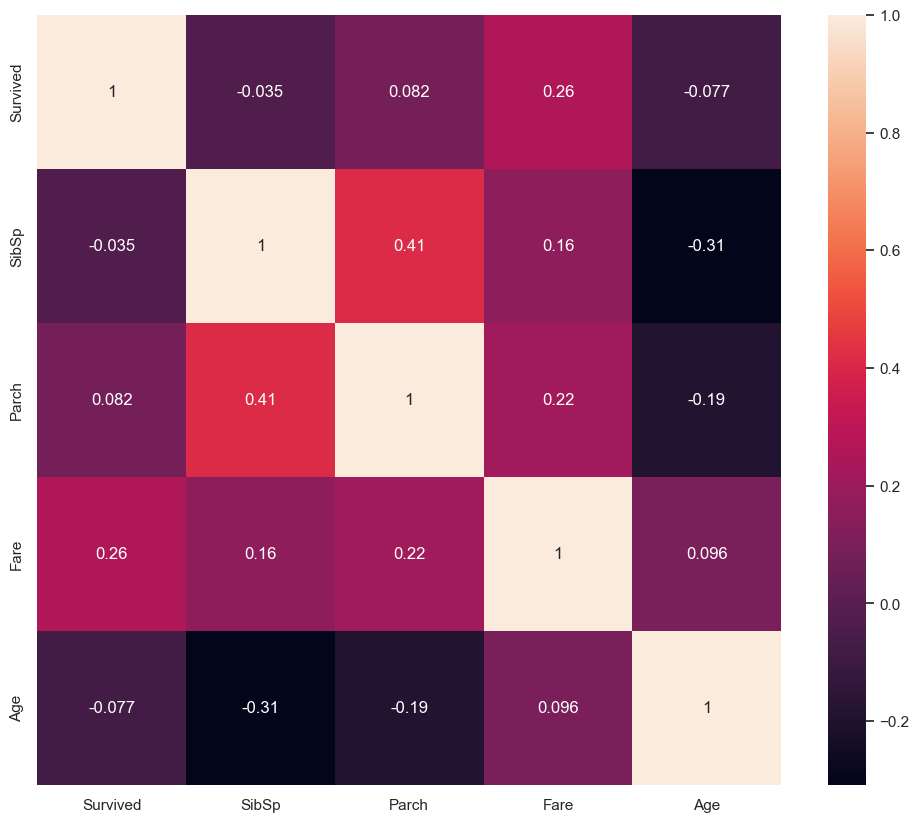

In [82]:
heatmap=sns.heatmap(data[["Survived","SibSp","Parch","Fare","Age"]].corr(),annot=True)

In [83]:
#Sibsp-number of siblings/spouse abord the titanic

In [84]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

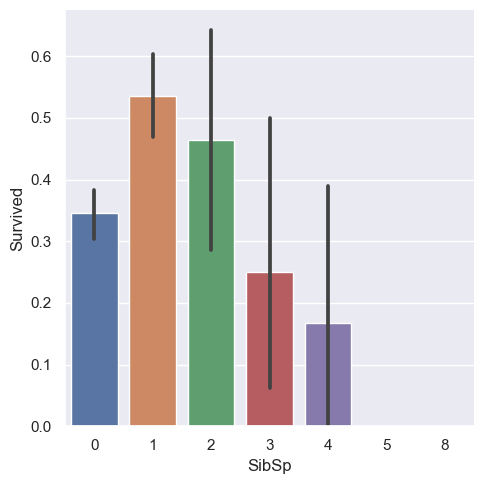

In [85]:
sns.catplot(x="SibSp",y="Survived",data=data,kind='bar')

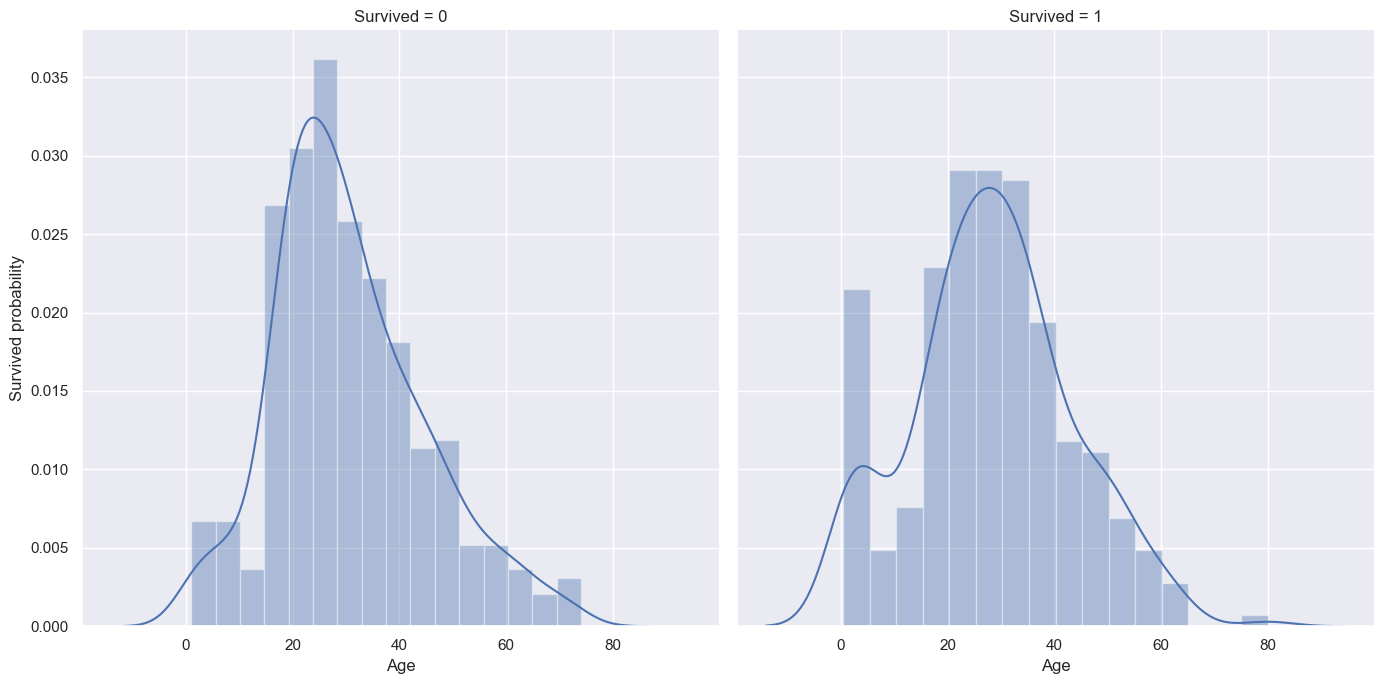

In [86]:
age_visual=sns.FacetGrid(data,col='Survived',height=7)
age_visual=age_visual.map(sns.distplot,"Age").set_ylabels("Survived probability")

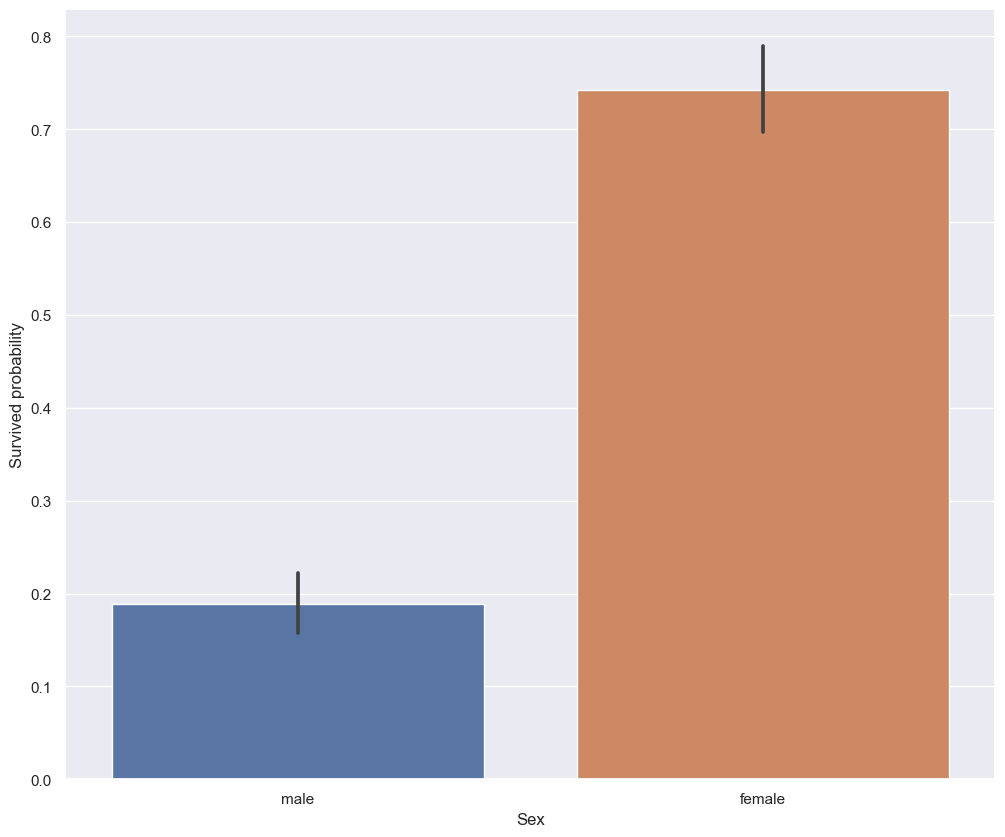

In [87]:
#sex

age_plot=sns.barplot(x="Sex",y="Survived",data=data).set_ylabel("Survived probability")

In [88]:
data[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


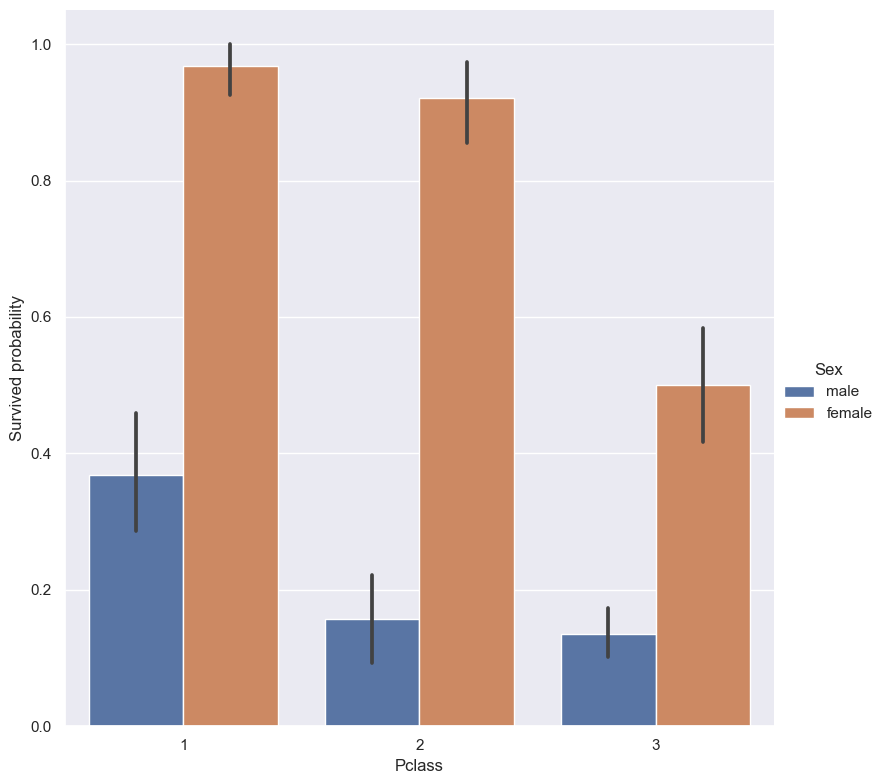

In [89]:
#pclass

pclass=sns.catplot(x="Pclass",y="Survived",data=data,kind="bar",hue="Sex",height=8).set_ylabels("Survived probability")

In [90]:
#embarked
data["Embarked"].isnull().sum()


2

In [91]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [92]:
data["Embarked"]=data["Embarked"].fillna('S')

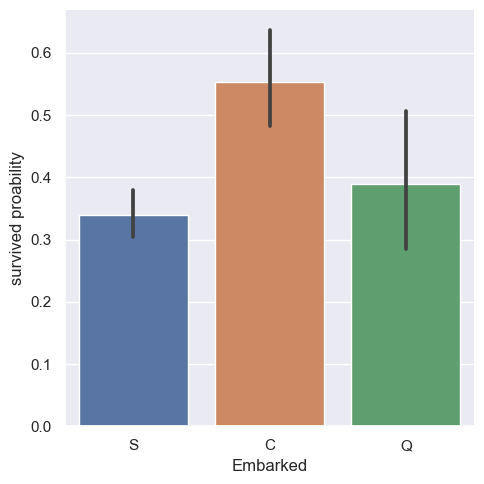

In [93]:
g=sns.catplot(x="Embarked",y="Survived",data=data,kind="bar").set_ylabels("survived proability")

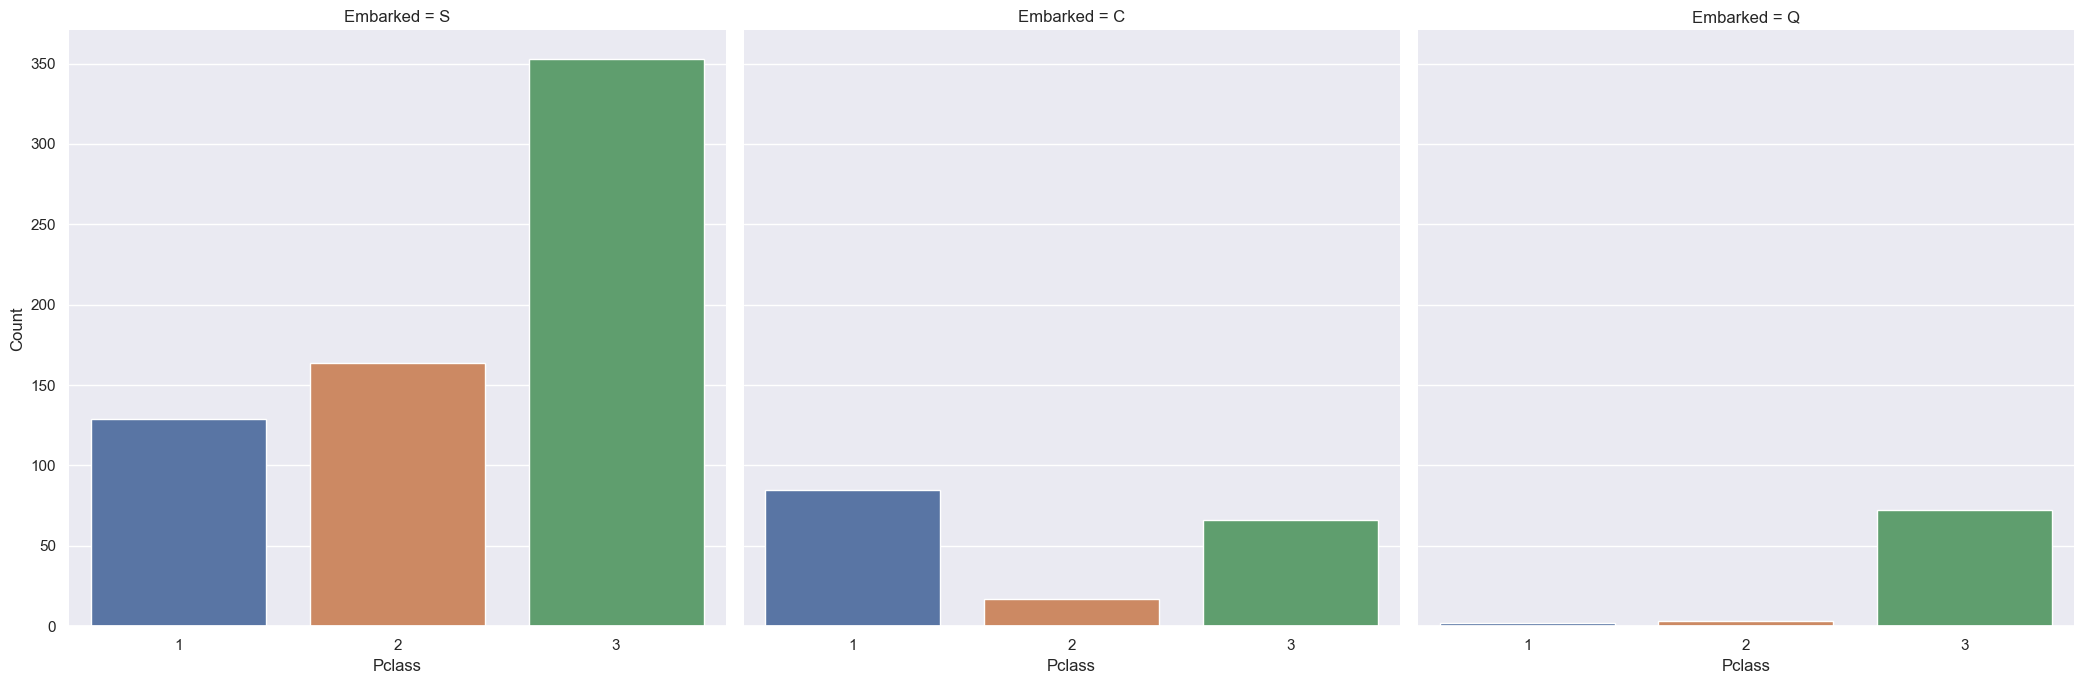

In [94]:
#explore pclass vs embarked

g=sns.catplot(x="Pclass",col="Embarked",data=data,height=7,kind="count")
g.despine(left=True)
g=g.set_ylabels("Count")

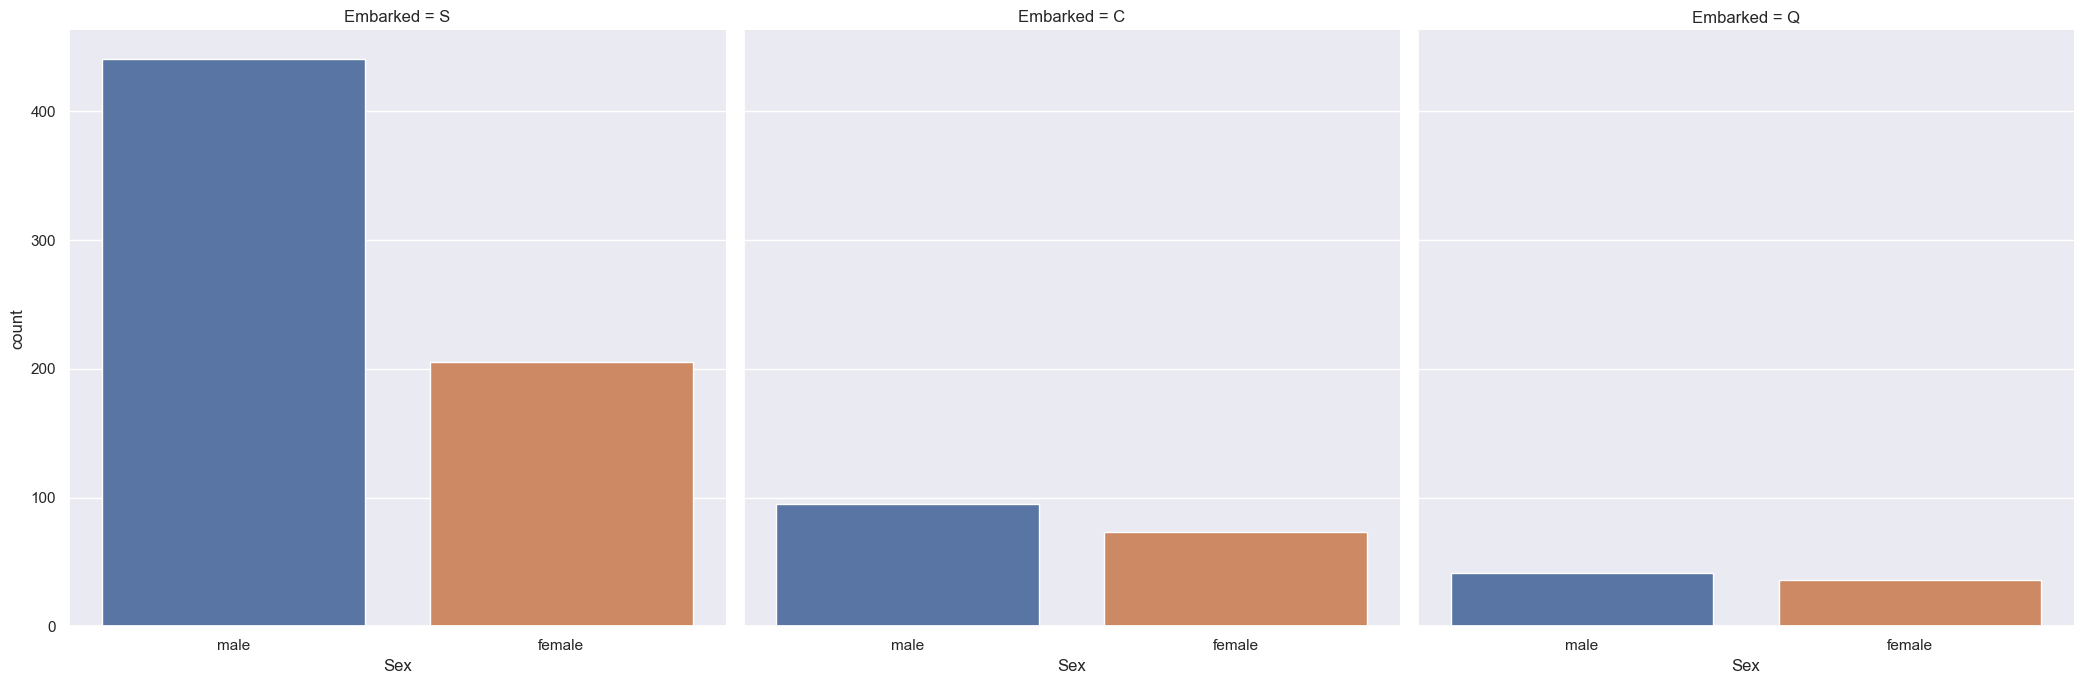

In [99]:
g=sns.catplot(x="Sex",col="Embarked",data=data,height=7,kind="count")

In [100]:
#preparing  data

mean=data['Age'].mean()
std=data["Age"].std()
is_null=data["Age"].isnull().sum()

In [101]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [102]:
rand_age=np.random.randint(mean-std,mean+std,size=is_null)

In [103]:
a=data['Age'].copy()
a[np.isnan(a)]=rand_age
data['Age']=a

In [104]:
data['Age'].isnull().sum()

0

In [105]:
data["Embarked"]=data["Embarked"].fillna("S")
col_to_drop=["PassengerId","Cabin","Ticket","Name"]
data.drop(col_to_drop,axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [106]:
genders={"male":0,"female":1}
data["Sex"]=data["Sex"].map(genders)
ports={"S":0,"C":1,"Q":2}
data["Embarked"]=data["Embarked"].map(ports)
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [107]:
#splitting the data

x=data.drop(data.columns[[0]],axis=1)
y=data["Survived"]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [108]:
#Scalling 

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtext=sc_x.transform(xtest)


In [109]:
#Classification


logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
rf_classifier=RandomForestClassifier(n_estimators=1000)

In [110]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [111]:
logreg_ypredict=logreg.predict(xtest)
svc_classifier_ypredict=svc_classifier.predict(xtest)
dt_classifier_ypredict=dt_classifier.predict(xtest)
knn_classifier_ypredict=knn_classifier.predict(xtest)
rf_classifier_ypredict=rf_classifier.predict(xtest)

In [112]:
from sklearn.metrics import accuracy_score

logreg_acc=accuracy_score(ytest,logreg_ypredict)
svc_classifier_acc=accuracy_score(ytest,svc_classifier_ypredict)
dt_classifier_acc=accuracy_score(ytest,dt_classifier_ypredict)
knn_classifier_acc=accuracy_score(ytest,knn_classifier_ypredict)
rf_classifier_acc=accuracy_score(ytest,rf_classifier_ypredict)


In [113]:
print("logistc regression: ",round(logreg_acc*100,2))
print("Support Vector    : ",round(svc_classifier_acc*100,2))
print("Decision Tree     : ",round(dt_classifier_acc*100,2))
print("K_NN Classifier   : ",round(knn_classifier_acc*100,2))
print("Random Forest     : ",round(rf_classifier_acc*100,2))

logistc regression:  64.55
Support Vector    :  62.69
Decision Tree     :  73.13
K_NN Classifier   :  66.42
Random Forest     :  69.03
